<left>
<img src="idc_logo.png" width=100 align="left">
</left>

<H4>Advanced Stats. for Data Science (Spring 2022)</H4>

<H1>Examples from Lecture 5 </H1>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

import scipy
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams.update({'font.size': 18})
%matplotlib inline

# T-test

In [2]:
true_mean = 11_277
reported_mean = 11_300
std = 10_000
n = 3_759_000

t = np.sqrt(n) * (reported_mean - true_mean) / std
t

4.459272362168519

In [7]:
2*scipy.stats.t.sf(t, df=10000)

8.31353356049471e-06

In [287]:
y = np.array([15,7,9,10,7,8,20,16,9,19,14,10,11,10,10,12,7])
mu_hat = y.mean()
s2_hat = y.var(ddof = 1)

mu0 = 10

t = (mu_hat - mu0) / np.sqrt(s2_hat / (len(y)-1) )

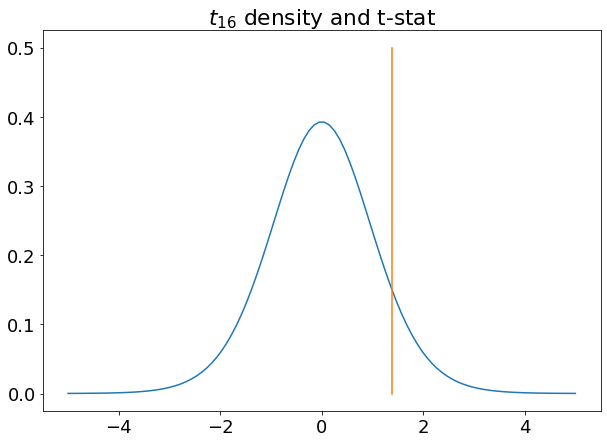

In [288]:
tt = np.linspace(-5, 5, 100)
yy = scipy.stats.t.pdf(tt, df=len(y)-1)

plt.plot(tt, yy)
plt.plot([t, t], [0, .5])
plt.title("$t_{" + f"{len(y)-1}" + "}$" + " density and t-stat")
plt.show()

In [291]:
2*scipy.stats.t.sf(abs(t), df = len(y) - 1 )

0.18202355774067427

## Coinfidenct interval 

In [299]:
true_mu = 2
n = 1000
nMonte = 100
alpha = 0.01

df = pd.DataFrame()


for itr in range(nMonte):
    z = np.random.randn(n)
    x = mu + z

    mu_hat = np.mean(x)
    s = np.std(x, ddof = 1)

    t_alpha_bar = scipy.stats.t.ppf(1 - alpha / 2, df=n-1)

    l = mu_hat - (s / np.sqrt(n)) * t_alpha_bar
    u = mu_hat + (s / np.sqrt(n)) * t_alpha_bar
    df = df.append(dict(
        itr = itr,
        true_mu = 2,
        alpha = alpha,
        n = n,
        s = s,
        l = l,
        u = u,
        mu_hat = mu_hat,
    ), ignore_index=True)


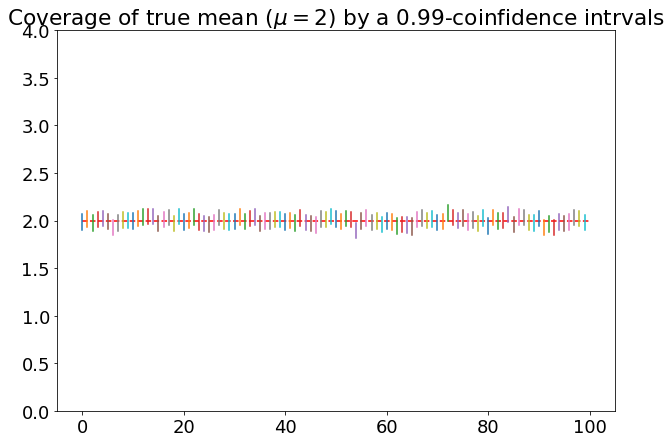

Fraction of successful coverage:  0.99


In [300]:
plt.plot([0, nMonte], [true_mu, true_mu], '--r')
plt.plot([df.itr, df.itr], [df.l, df.u])
plt.ylim((0,4))
plt.title(f"Coverage of true mean ($\mu={true_mu}$) by a {1-alpha}-coinfidence intrvals")
plt.show()
df['covering'] = (df.true_mu < df.u) & (df.true_mu > df.l)
print("Fraction of successful coverage: ", np.mean(df.covering))

## Power Example

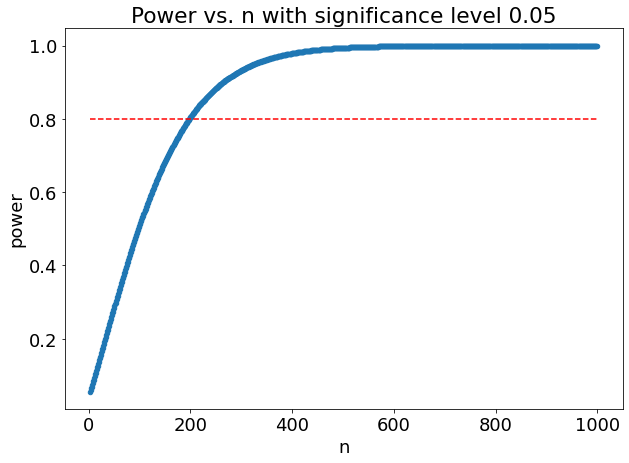

In [306]:
from scipy.stats import ncf
from scipy.stats import f

mu0 = 10
delta = 1
alpha = 0.05
sigma = 5

df = pd.DataFrame()
for n in range(3, 1000):
    lam = ( delta / sigma * np.sqrt(n) ) ** 2
    f_crit = f.ppf( 1 - alpha, dfn=1, dfd=n-1 )
    power = 1 - ncf.cdf( f_crit, dfn=1, dfd=n-1, nc=lam )
    
    df = df.append(dict(n=n, power=power, alpha=alpha), ignore_index=True)
    
df.plot.scatter(x='n',y= 'power')
plt.plot([3,1000], [.8, .8], '--r') # 80% power line
plt.title(f"Power vs. n with significance level {alpha}")
plt.show()